In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Wavelength

In [94]:
wavelength = 525*1e-6

In [ ]:
# Determining the wavelength
def disp_to_wavelength(N, delx):
    """Returns wavelength from displacement and fringe count"""
    return 2*delx/N


delx = []
disp_to_wavelength(N, delx)

In [2]:


def fringe_to_dist(wavelength, N):
    """Returns distance based on wavlength and number of fringes"""
    return N*wavelength/2


## Temp coeff

In [22]:
# Determining thermal expansion coefficient

# Temperatures when new fringe appears TODO: Check data
tmps_ascending = [29.0,29.1,29.3,29.4,29.5,29.6,29.6,29.8,30.0,30.2,30.3,30.4,30.6,30.8,30.8,30.9,31.0,31.2,31.4,31.5,31.8,32,32.1,32.2,32.3,32.5,32.7,32.8,32.9,33.1,33.2,33.3,33.3,33.4,33.5,33.6,33.9,34,34.1,34.3,34.5,34.6,34.7,34.8,34.9,35.1,35.3,35.4,35.6,35.8,35.9,36.0,36.1,36.3,36.5,36.6,36.7,36.8,36.9,37.0,37.2,37.2,37.3,37.4,37.6]
temps_descending = [37.7,37.6,37.4,37.3,37.2,37.1,37,36.8,36.6,36.4,36.2,36.2,36,35.9,35.9,35.8,35.6,35.4,35.3,35.2,35.0,34.8,34.7,34.6,34.6,34.5,34.2,34.1,34.0,33.9,33.8,33.5,33.4,33.3,33.3,33.1,32.9,32.8,32.7,32.6,32.4,32.2,32.1,32.0,32.0,31.9,31.5]

# List of (start_T, stop_T, nr of fringes)
fringe_counted_for_tmp_diff = [(31, 33.1,20),(33.4,39.4,50), (40.5,47.2,50),(48,49.3,10),(46.2,42.9,25), (42.5,39.9,20), (38.3,37.1,10)]
long_count_tmp_diff = [i[1]-i[0] for i in fringe_counted_for_tmp_diff]
long_count_fringes = [i[2] for i in fringe_counted_for_tmp_diff]

def dist_temp_var_to_heat_coeff(delL,L_0,delT):
    """Returns temp coefficient with parameter"""
    return delL/L_0/delT

def compute_alpha_from_temp_list_using_rolling(temperature_list, L0, rolling):
    """Computes thermal expansion coeff, from list of temperatures"""
    # Temperature when new fringe appeared in ascending order 
    # Rolling difference first item needs to be treated seperately, (last element not computed)
    temp_diff_1 = np.diff(temperature_list,rolling)
    fringe_count = np.linspace(1,len(temp_diff_1),len(temp_diff_1))
    temp_diff_1_dist = fringe_to_dist(525*1e-6, fringe_count)
    return dist_temp_var_to_heat_coeff(temp_diff_1_dist,1,temp_diff_1)

# TODO Fix L0 and wavelength (idk)
L0 = 1
heat_coeff_rolling_params_ascending_sample = [compute_alpha_from_temp_list_using_rolling(temperature_list=tmps_ascending, L0=L0, rolling=i) for i in range(1,10)]
heat_coeff_rolling_params_descending_sample = [np.abs(compute_alpha_from_temp_list_using_rolling(temperature_list=temps_descending, L0=L0, rolling=i)) for i in range(1,10)]
heat_coeff_long_count = [np.abs(dist_temp_var_to_heat_coeff(delL=fringe_to_dist(525*1e-6, long_count_fringes[i]),L_0=L0,delT=long_count_tmp_diff[i])) for i in range(len(long_count_fringes))]

/tmp/ipykernel_909432/3239728117.py:14: RuntimeWarning: divide by zero encountered in true_divide
  return delL/L_0/delT


In [28]:
from IPython.display import display, Math, Latex
np.mean(heat_coeff_long_count), np.std(heat_coeff_long_count)
display(Latex('The coefficient is determined to be ${:.4}\pm{:.4}$'.format(np.mean(heat_coeff_long_count), np.std(heat_coeff_long_count))))
print('FIX L0')

<IPython.core.display.Latex object>

FIX L0


## Index of Refraction

In [95]:
# Index of refraction
t = 0.83*10 # mm 

# Angle per fringe start 5/25 of a deg --- alll in deg
theta = [13/25,20/25,1+1/25,1+6/25,1+10.5/25,1+15/25,1+20/25,1+22/25,1+23/25,2+2/25,2+6/25,2+9/25,2+13/25,2+15/25,2+18.5/25,2+21/25,2+24/25, 3+1/25,3+3/25,3+55/25,3+8/25,3+9/25,3+12/25,3+14/25, 3+16/25, 3+18/25, 3+20/25,3+22/25,3+24/25,4+1/25,4+2.5/25,4+5/25,4+6/25, 4+8/25,4+10/25,4+12/25,4+13/25,4+15/25,4+17/25,4+18/25,4+20/25,4+22/25,4+23.5/25,5,5+2/25,5+3/25,5+4.5/25,5+6/25,5+8.5/25,5+10.5/25,5+12/25,5+13/25,5+15/25,5+16/25,5+18/25,5+19/25,5+20/5,5+21/25,5+23/25,6]
theta = [i*np.pi/180 for i in theta]

In [96]:
def get_angle(N, wavlength, angle, thickness):
    num = (N*wavelength/2*wavelength+np.cos(angle)-1)**2+np.sin(angle)**2
    den = 2*(-N*wavelength/2*thickness-np.cos(angle)+1)**2
    return num/den

In [97]:
fringes = np.linspace(1,len(theta),len(theta))
index = get_angle(fringes, wavelength,theta,t)

In [98]:
index[15:22]

array([1.08585433, 1.04655661, 0.98435047, 0.9304121 , 2.64320705,
       0.86394355, 0.80489645])

Mode of dataset 0.9843504730267623
Last datapoint 0.3492149244660835
Average 1.1426162841945264
Std 1.3977627729021818


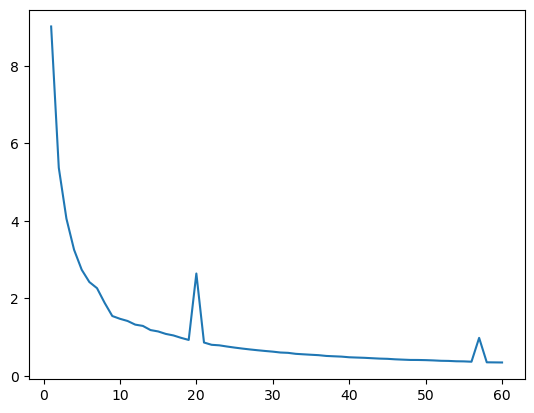

In [116]:
plt.plot(fringes, index)
print("Mode of dataset {}".format(max(set(index), key=list(index).count)))
print("Last datapoint {}".format(index[-1]))
print("Average {}".format(np.mean(index)))
print("Std {}".format(np.std(index)))

In [102]:
index_one_to_one=get_angle(1, wavelength,np.diff(theta),t)

In [117]:
print("Mode of dataset {}".format(max(set(index_one_to_one), key=list(index_one_to_one).count)))
np.mean(index_one_to_one)

Mode of dataset 0.20553154263135479


148.5061267748918

(0.0, 2.0)

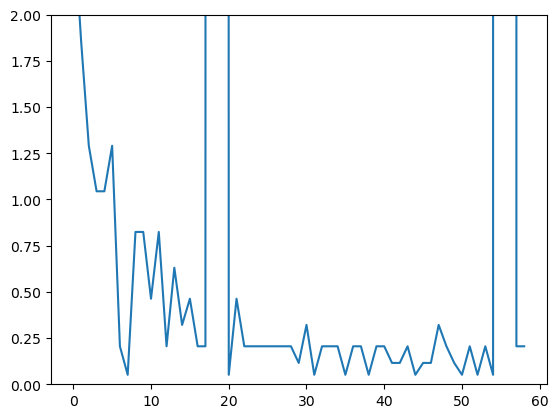

In [107]:
plt.plot(index_one_to_one)
plt.ylim(0,2)

## Piezzo

In [58]:
# Data
# Voltage when fringe disappeared, starting point 0.02V
det_piezzo_up = [0.9,2.22,3.52,4.95,5.95,7.05,8.15,9.36, 10.57,11.78, 12.79,13.8,14.6,15.9,16.82,17.93,18.74,19.74,20.65, 21.56,22.36,23.27,24.18,24.69,25.69,26.50,27.10,28.01,28.7,29.5,30.33, 31.13, 31.84,32.52,33.34,34.25,34.86,35.67,36.37,37.18,37.88,38.59,39.29,40.20,40.89, 41.51,42.31,43.12,43.83,44.73,45.33,46.15,46.75,47.55,48.36,48.96,49.85,50.48, 51.18,51.98,52.89,53.59,54.3,55.00,55.8,56.7,57.4,58.21,59.02,59.73,60.44,61.34,62.15,62.86,63.57,64.26,65.27, 66.09, 66.87,67.59,68.48,69.32,69.99,70.79,71.59,72.4,73.2,73.91,74.81]
# Voltage when fringe appears, starting point 74.9V
det_piezzo_down = [74.4,72.72,71.19,69.78,68.17,66.98,65.65,64.26,62.86,61.63,60.42,59.21,58.11,56.69,55.78,54.60,53.48,52.48,51.37,50.26,49.14,48.15,47.14,45.92,44.91,44.11,43.01,42.01,41.20,40.18,39.08,38.18,37.37,36.47,35.56,34.55,33.74,32.84,32.04,31.13,30.01,29.41,28.4,27.59,26.60,26.09,24.99,24.08,23.28,22.47,21.66,20.74,20.05,19.05,18.34,17.53,16.72,16.02,15.32,14.31,13.71,12.80,12.09,11.29,10.48,9.78,8.27,7.64,6.73,5.95,5.25,4.34,3.84,3.03,2.23,1.49,0.72,0.01]
# Double fringe for voltage measuremnt start at 0.49V
det_piezzo_up_double = [3.31,5.73,8.04,10.26,12.58,14.90,16.81,18.93,20.95,22.76,24.67,26.59,28.4,30.32,32.03,33.84,35.76,37.27,38.78,40.69,42.5,44.11,45.82,47.34,49.15,50.75,52.47,54.08,55.78,57.50,59.01,60.81,62.53,64.22,65.95,67.68,69.27,70.99,72.79,74.5]
# And back down start74.56V
det_piezzo_down_double = [72.37,70.64,67.73,65.12,62.51,59.8,57.48,55.15,52.84,50.83, 48.61,46.51,44.48,42.47,40.66,38.45,36.74,34.11,32.1,30.38,28.57,27.27,25.35,23.73,21.74,19.91,18.10,16.59,14.98,13.66,12.77,11.36,9.54,8.03,6.61,4.89,3.41,2.17,0.66]


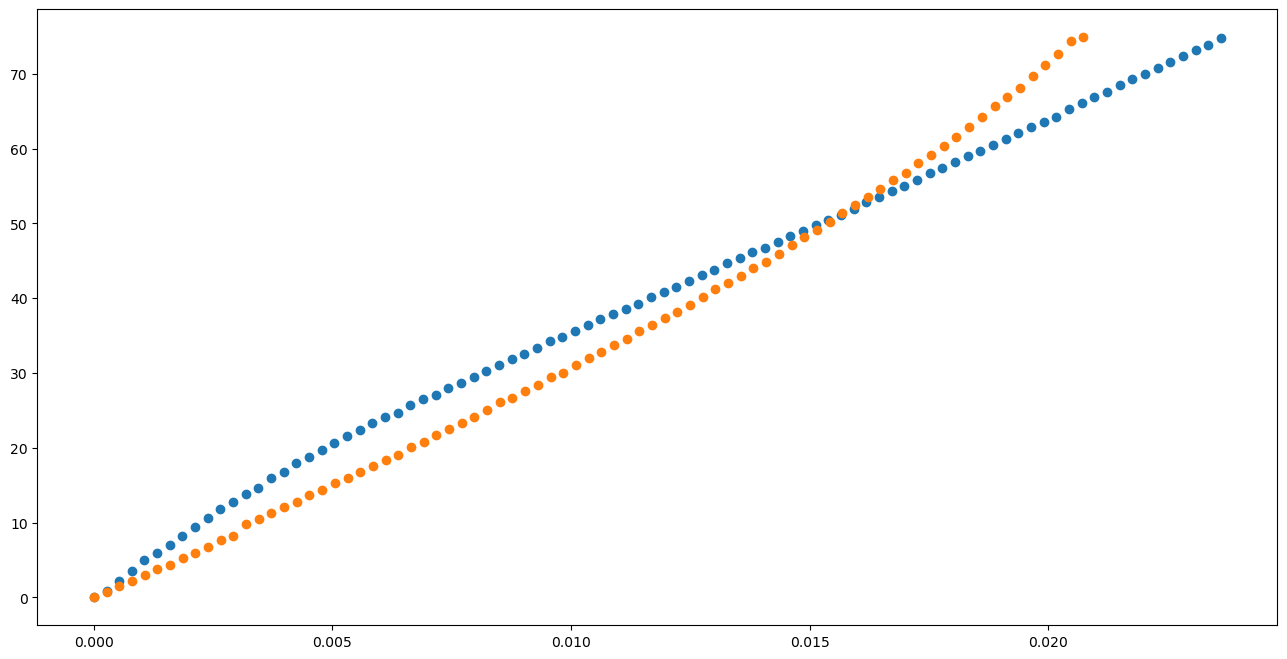

In [64]:
# Plot TODO: Redo
fig = plt.figure(figsize=(16,8))
det_piezzo_up_ws = [0.02]+det_piezzo_up
piezzo_up_dist = np.linspace(0,len(det_piezzo_up)+1,len(det_piezzo_up)+1)
piezzo_up_dist = fringe_to_dist(wavelength, piezzo_up_dist)
piezzo_up_dist = [i for i in piezzo_up_dist]

plt.scatter(piezzo_up_dist, det_piezzo_up_ws,label='increasing Voltage')

det_piezzo_down_ws = [74.9]+det_piezzo_down
piezzo_down_dist = np.linspace(0,len(det_piezzo_down)+1,len(det_piezzo_down)+1)
piezzo_down_dist = fringe_to_dist(wavelength, piezzo_down_dist)
piezzo_down_dist = [max(piezzo_down_dist)-i for i in piezzo_down_dist]

plt.scatter(piezzo_down_dist, det_piezzo_down_ws,label='increasing Voltage')

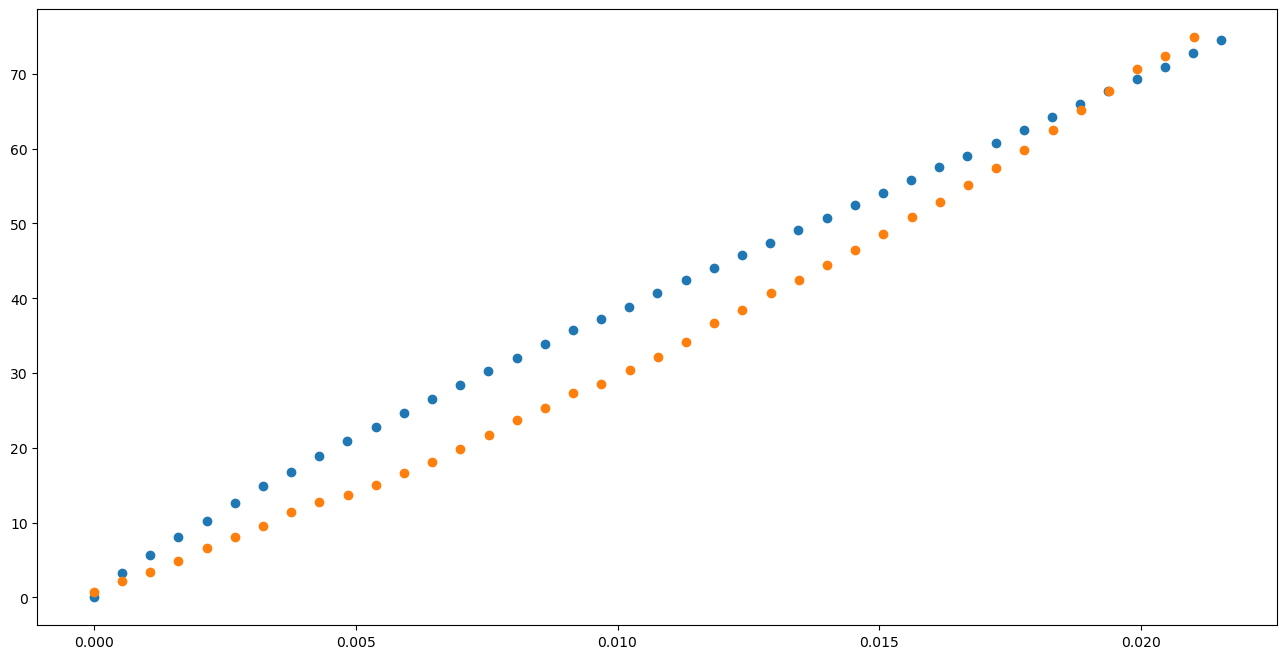

In [67]:
# Plot
fig = plt.figure(figsize=(16,8))
det_piezzo_up_d_ws = [0.02]+det_piezzo_up_double
det_piezzo_up_double_dist = np.linspace(0,len(det_piezzo_up_double)+1,len(det_piezzo_up_double)+1)
det_piezzo_up_double_dist = fringe_to_dist(wavelength, det_piezzo_up_double_dist)
det_piezzo_up_double_dist = [i*2 for i in det_piezzo_up_double_dist]

plt.scatter(det_piezzo_up_double_dist, det_piezzo_up_d_ws,label='increasing Voltage')

det_piezzo_down_double_ws = [74.9]+det_piezzo_down_double
det_piezzo_down_double_dist = np.linspace(0,len(det_piezzo_down_double)+1,len(det_piezzo_down_double)+1)
det_piezzo_down_double_dist = fringe_to_dist(wavelength, det_piezzo_down_double_dist)
det_piezzo_down_double_dist = [(max(det_piezzo_down_double_dist)-i)*2 for i in det_piezzo_down_double_dist]

plt.scatter(det_piezzo_down_double_dist, det_piezzo_down_double_ws,label='increasing Voltage')

In [63]:
len(det_piezzo_up_double_dist), len(det_piezzo_down_double_dist)

(41, 40)